In [1]:
import os
import numpy as np
import shutil
import pandas as pd

In [2]:
def train_test_split():
    print("########### Train Test Val Script started ###########")

    root_dir = 'Animal-split'
    
    classes_dir = ['black panther', 'leopard', 'lion', 'tiger', 'wild cat']

    processed_dir = 'Animals'

    val_ratio = 0.20
    test_ratio = 0.20

    for cls in classes_dir:
        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"//" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(root_dir + '/train//' + cls)
        os.makedirs(root_dir + '/val//' + cls)
        os.makedirs(root_dir + '/test//' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train//' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val//' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test//' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

########### Train Test Val Script started ###########
$$$$$$$ Class Name black panther $$$$$$$
Total images: 1000
Training: 600
Validation: 200
Testing: 200
$$$$$$$ Class Name leopard $$$$$$$
Total images: 1000
Training: 600
Validation: 200
Testing: 200
$$$$$$$ Class Name lion $$$$$$$
Total images: 1000
Training: 600
Validation: 200
Testing: 200
$$$$$$$ Class Name tiger $$$$$$$
Total images: 1000
Training: 600
Validation: 200
Testing: 200
$$$$$$$ Class Name wild cat $$$$$$$
Total images: 1044
Training: 626
Validation: 209
Testing: 209
########### Train Test Val Script Ended ###########


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen =ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen =ImageDataGenerator(rescale=1./255)

In [5]:
root_dir = 'Animal-split'

In [6]:
x_train = train_datagen.flow_from_directory(root_dir + '/train//',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode="categorical",
                                          batch_size=32)

Found 3026 images belonging to 5 classes.


In [7]:
x_test = train_datagen.flow_from_directory(root_dir + '/test//',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode="categorical",
                                          batch_size=32)

Found 1009 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


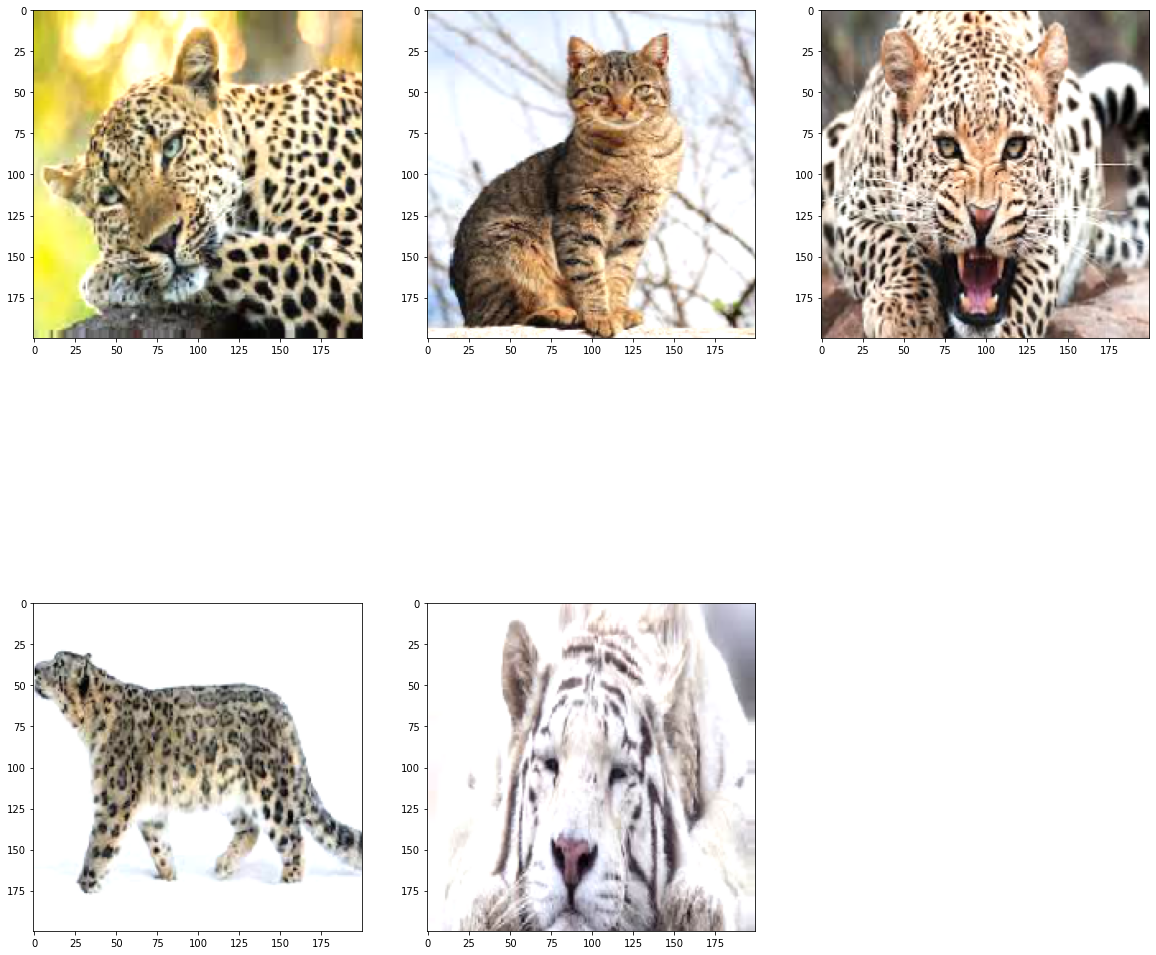

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i,image in enumerate(x_train,1):
    if(i==6):
        break
    plt.subplot(2,3,i)
    plt.imshow(image[0][15])

In [8]:
x_train.class_indices

{'black panther': 0, 'leopard': 1, 'lion': 2, 'tiger': 3, 'wild cat': 4}

In [9]:
cnn =Sequential()

In [10]:
cnn.add(Conv2D(filters=32,
              kernel_size=(3,3),
              strides =(2,2),
              input_shape =(256,256,3),
              activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2),
                  strides=(2,2)))

In [11]:
cnn.add(Conv2D(filters=32,
              kernel_size=(3,3),
              strides =(2,2),
              activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2),
                 strides=(2,2)))

In [12]:
cnn.add(Flatten())

In [13]:
cnn.add(Dense(kernel_initializer='random_uniform',activation='relu',units=500))
cnn.add(Dense(kernel_initializer='random_uniform',activation='relu',units=500))
cnn.add(Dense(kernel_initializer='random_uniform',activation='relu',units=500))

In [14]:
cnn.add(Dense(kernel_initializer='random_uniform',activation='softmax',units=5))

In [15]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 500)               3

In [17]:
3026/32

94.5625

In [18]:
1009/32

31.53125

In [19]:
cnn.fit_generator(x_train,steps_per_epoch=94,epochs=10,validation_data=x_test,validation_steps=31)

C:\Users\Mounica\AppData\Local\Temp/ipykernel_9932/3037077894.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(x_train,steps_per_epoch=94,epochs=10,validation_data=x_test,validation_steps=31)


Epoch 1/10
94/94 [==============================] - 335s 4s/step - loss: 1.4207 - accuracy: 0.3347 - val_loss: 1.2463 - val_accuracy: 0.4274
Epoch 2/10
94/94 [==============================] - 231s 2s/step - loss: 1.2393 - accuracy: 0.4395 - val_loss: 1.1932 - val_accuracy: 0.4718
Epoch 3/10
94/94 [==============================] - 223s 2s/step - loss: 1.1344 - accuracy: 0.4963 - val_loss: 1.0629 - val_accuracy: 0.5716
Epoch 4/10
94/94 [==============================] - 222s 2s/step - loss: 1.0383 - accuracy: 0.5504 - val_loss: 1.0250 - val_accuracy: 0.5827
Epoch 5/10
94/94 [==============================] - 219s 2s/step - loss: 0.9334 - accuracy: 0.6232 - val_loss: 0.9576 - val_accuracy: 0.5776
Epoch 6/10
94/94 [==============================] - 217s 2s/step - loss: 0.8703 - accuracy: 0.6553 - val_loss: 0.9503 - val_accuracy: 0.6129
Epoch 7/10
94/94 [==============================] - 223s 2s/step - loss: 0.8369 - accuracy: 0.6583 - val_loss: 0.8943 - val_accuracy: 0.6613
Epoch 8/10
94

In [20]:
cnn.save('animals.h5')

In [21]:
from keras.models import load_model
import cv2
import numpy as np

In [22]:
cnnmodel = load_model("animals.h5")

In [23]:
def detect(frame):
    img=cv2.resize(frame,(256,256))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #scaling to 0 to 1 range 
    if(np.max(img)>1):
            img = img/256
    img = np.array([img])
    prediction = cnnmodel.predict(img)
    label=['black panther', 'leopard', 'lion', 'tiger', 'wild cat']
    prediction = np.argmax(prediction)
    print("Prediction:",prediction)
    return plt.imshow(img[0]),print(label[prediction])

In [27]:
image = cv2.imread('a1.jpg')

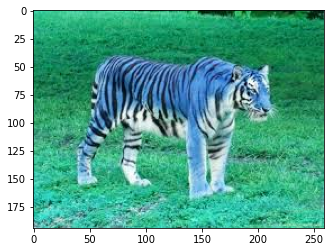

In [28]:
import matplotlib.pyplot as plt
plt.imshow(image)

1/1 [==============================] - 0s 56ms/step
Prediction: 3
tiger


(<matplotlib.image.AxesImage at 0x2a92e860310>, None)

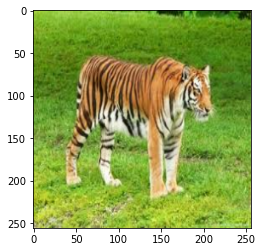

In [29]:
detect(image)